In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<a href="https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/experiments/dl_rgr_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Comparison of deep learning architectures


In [1]:

from ai4water.datasets import MtropicsLaos
from ai4water.utils.utils import get_version_info
from ai4water.experiments import DLRegressionExperiments

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [3]:
dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos",  # path where the data is saved, if not availble leave it to None
                      )


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


In [4]:
lookback = 18
data =    dataset.make_regression(lookback_steps=lookback)

print(data.shape)

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(3691, 9)


In [5]:
data.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 14:54:00,22.538134,96.169885,4.3,167.8,133.000000,0.0,0.9,2.868160e+15,NaN
2011-05-25 15:00:00,22.538271,96.170115,4.0,158.0,133.000000,0.0,0.9,2.868160e+15,NaN
2011-05-25 15:06:00,22.538407,96.170345,3.7,150.0,133.000000,0.0,0.9,2.868160e+15,NaN
2011-05-25 15:12:00,22.538544,96.170575,3.4,142.0,132.988889,0.0,0.9,2.868160e+15,NaN
2011-05-25 15:18:00,22.538680,96.170805,3.1,134.0,132.977778,0.0,0.9,2.868160e+15,NaN


In [6]:
print(data.isna().sum())

air_temp           0
rel_hum            0
wind_speed         0
sol_rad            0
water_level        0
pcp                0
susp_pm            0
Ecoli_source       0
Ecoli_mpn100    3433
dtype: int64


In [7]:
inputs = data.columns.tolist()[0:-1]
inputs

['air_temp',
 'rel_hum',
 'wind_speed',
 'sol_rad',
 'water_level',
 'pcp',
 'susp_pm',
 'Ecoli_source']

In [8]:
outputs = data.columns.tolist()[-1:]
outputs

['Ecoli_mpn100']

In [9]:
comparisons = DLRegressionExperiments(
    input_features=inputs,
    output_features=outputs,  
    x_transformation="minmax",
    y_transformation={'method':'log', 'treat_negatives': True, 'replace_zeros': True},
    epochs=500,
    batch_size=16,
    ts_args={"lookback": lookback},
    verbosity=0,
    save=False,
)

In [10]:
comparisons.fit(data=data,
                include=['MLP',
                         'LSTM',
                         "CNN",
                         'CNNLSTM',
                         'TCN',
                         "TFT",
                         "LSTMAutoEncoder",
                         ])


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 18, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 18, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 18, 8)
target shape:  (78, 1)
running  MLP model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


running  LSTM model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


running  CNN model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


running  CNNLSTM model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


running  TCN model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.
overflow encountered in square


running  TFT model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


running  LSTMAutoEncoder model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 18, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 18, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 18, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


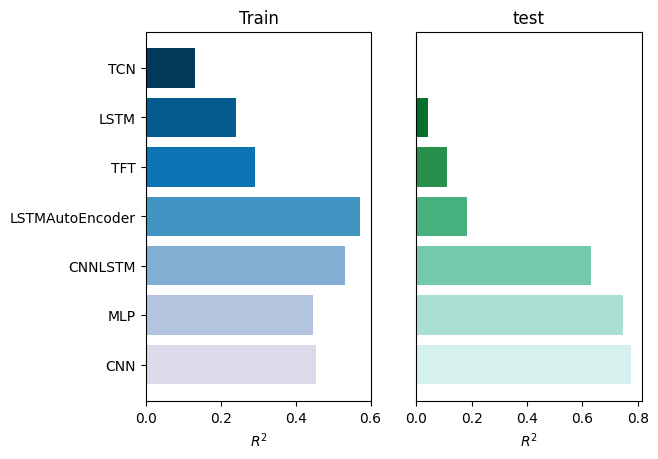

In [11]:
best_models = comparisons.compare_errors('r2', data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 18, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 18, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 18, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


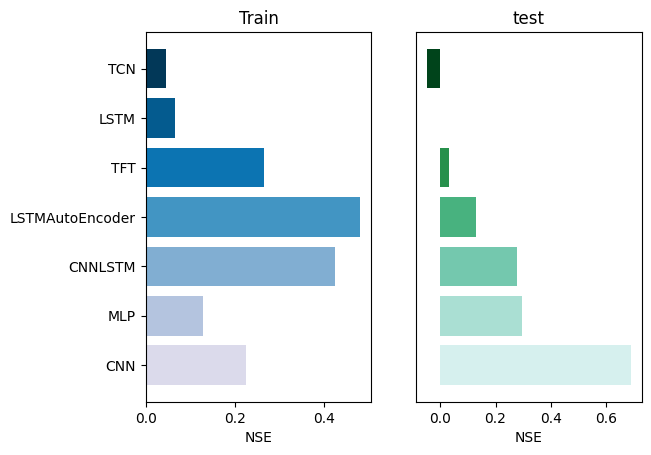

In [12]:
best_models = comparisons.compare_errors(
    'nse',
    data=data,
)

In [13]:
print(best_models)

                    train      test
CNN              0.225706  0.693526
MLP              0.129064  0.296447
CNNLSTM          0.423204  0.277023
LSTMAutoEncoder  0.481236  0.130555
TFT              0.264884  0.032711
LSTM             0.065246 -0.000764
TCN              0.045221 -0.050504



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 18, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 18, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 18, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


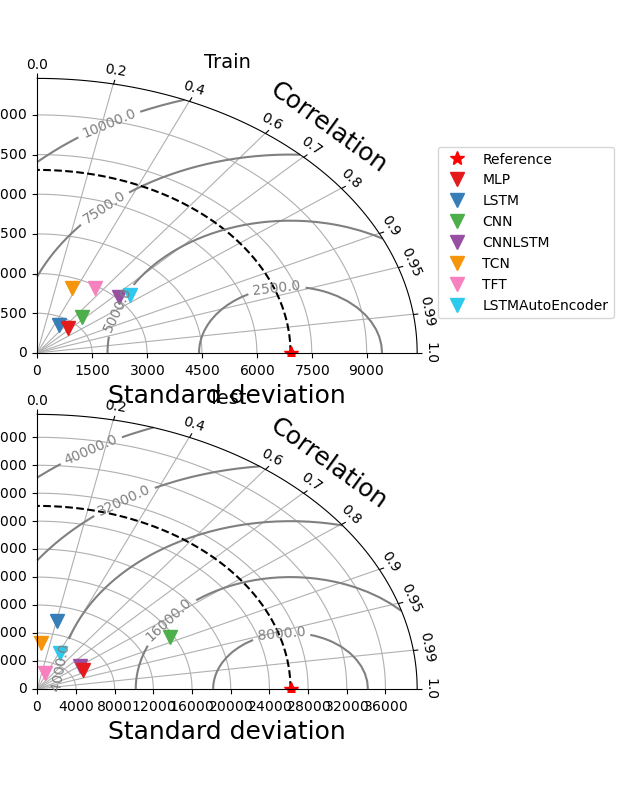

In [18]:
_ = comparisons.taylor_plot(data=data, 
                            figsize=(5,8), 
                            leg_kws=dict(bbox_to_anchor=(1.3, 0.8)))


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 18, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 18, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 18, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


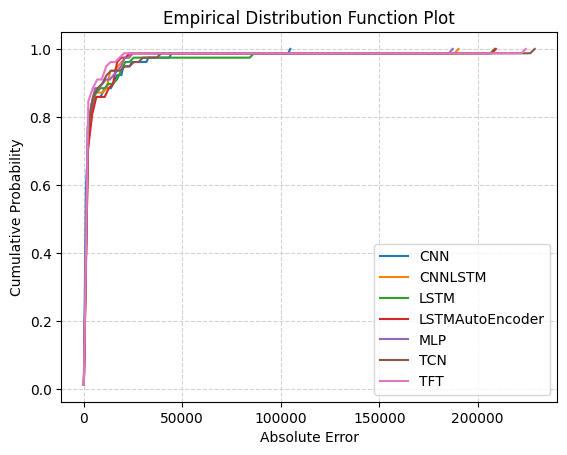

In [19]:
_ = comparisons.compare_edf_plots(data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 18, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 18, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 18, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


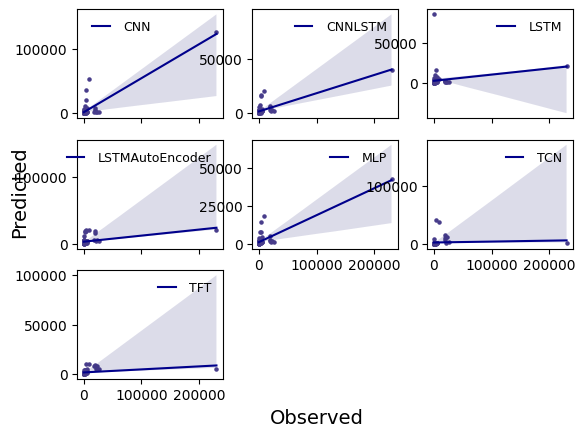

In [22]:
_ = comparisons.compare_regression_plots(data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 18, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 18, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 18, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


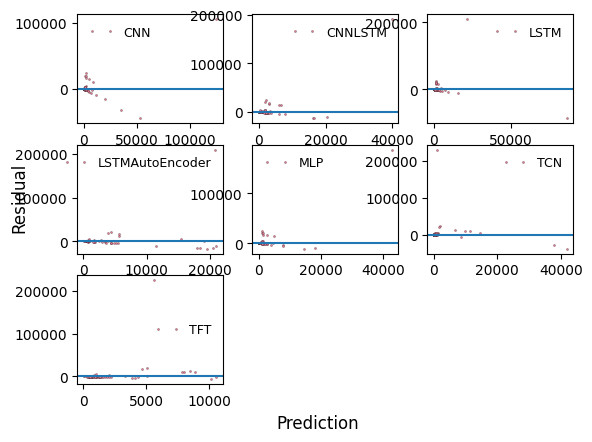

In [23]:
_ = comparisons.compare_residual_plots(data=data)

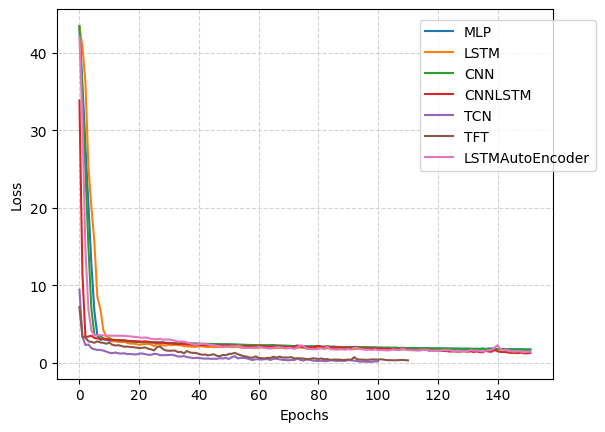

In [20]:
_ = comparisons.loss_comparison()

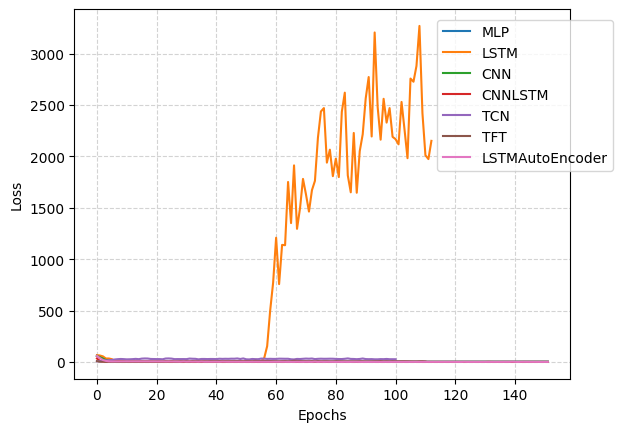

In [21]:
_ = comparisons.loss_comparison(loss_name="val_loss")